In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from city.generator_nodes import GeneratorNodes
from city.connector_nodes import ConnectorNodes

In [2]:
n_nodes = 250
n_neighborhood = 4

In [3]:
def create_node_data(nodes):
    
    node_data = dict()
    for node_id, node in enumerate(nodes):
        
        node_data[node] = {

            'node_id': node_id,
            'LAT': node[0], 
            'LON': node[1]
        }
       
    return node_data

In [4]:
gn = GeneratorNodes(n_nodes, n_neighborhood)
gn.generate_nodes()

In [5]:
node_data = create_node_data(gn.nodes)

In [6]:
def create_edge_data(node_data, connections):
    
    edge_data = dict()
    for node1, node2 in connections:
        
        dx = node1[0] - node2[0]
        dy = node1[1] - node2[1]
        
        edge_data[(node1, node2)] = {
            'node1_id': node_data[node1]['node_id'],
            'node2_id': node_data[node2]['node_id'],
            'time': np.random.uniform(1, 3) * np.hypot(dx, dy) 
        }
        
    return edge_data

In [7]:
cn = ConnectorNodes(gn.nodes)
cn.connect_nodes()

In [8]:
edge_data = create_edge_data(node_data, cn.connections)

In [9]:
G = nx.Graph()

In [10]:
for key in node_data:
    # Geographic Coordinate System -> GCS
    G.add_nodes_from([node_data[key]['node_id']],
                     LAT = node_data[key]['LAT'],
                     LON = node_data[key]['LON']
                    )

In [11]:
for key in edge_data:
    G.add_edge(edge_data[key]['node1_id'], 
               edge_data[key]['node2_id'], 
               Time = edge_data[key]['time']
              )

In [12]:
np.random.choice(G.nodes, 5)

array([  4,  52,  25, 180, 124])

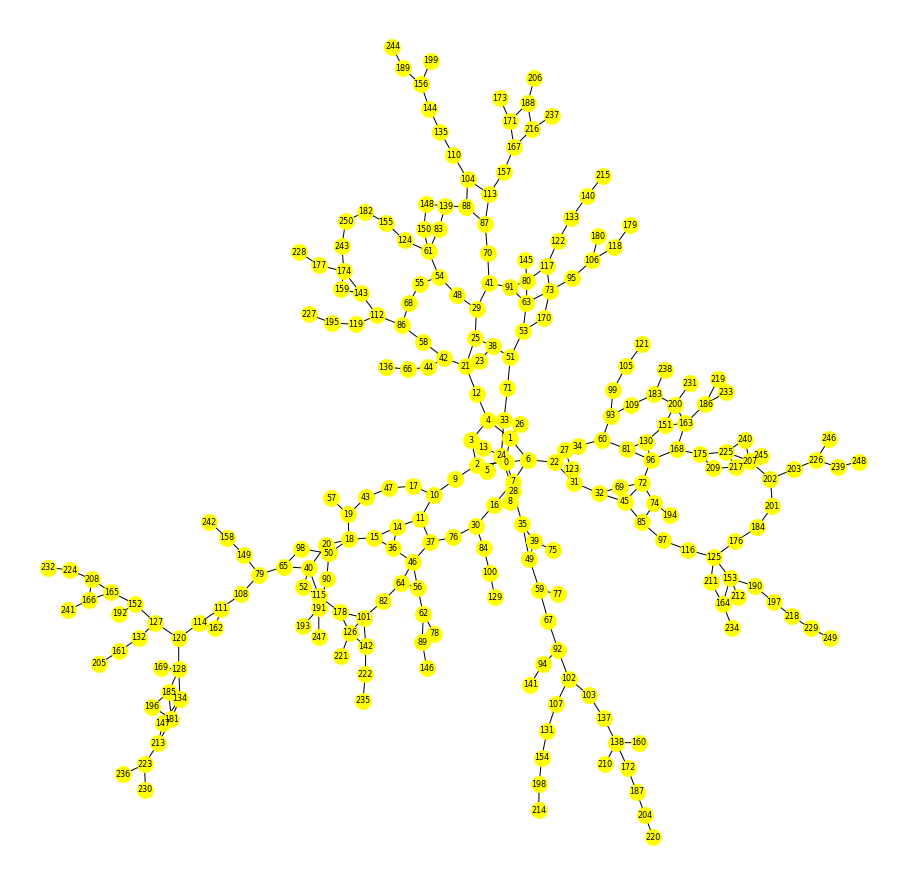

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog = 'neato')

nx.draw(G, pos, ax = ax, node_size = 250, node_color = 'yellow')
_ = nx.draw_networkx_labels(G, pos = pos, ax = ax, font_size = 8)

In [19]:
from gmca.mdb_index import MDBIndex
from gmca.chromosome import Chromosome
from gmca.population import Population
from gmca.genetic_algorithm import GMCA

In [20]:
gmca = GMCA(G, 5, 20)

TypeError: 'type' object is not subscriptable